## Data cleaning

In this notebook we clean the datasets and prepare them for further analysis.

The data have been collected using two database systems of the [Polish Central Statistical Office](https://stat.gov.pl/en/): the [Knowledge Databases](http://swaid.stat.gov.pl/en/SitePages/StronaGlownaDBW.aspx) and the [Local Data Bank](https://bdl.stat.gov.pl/bdl/start) (both available in English). The systems allow to access and download basic statistics collected by the Office, e.g. the economic or the social ones. Moreover, numerous sections of data are grouped into voivodeships (the administrative division system of Poland; see [here](https://en.wikipedia.org/wiki/Voivodeships_of_Poland) for details), which can be used to compare different regions of the country.

The details on particular datasets are described below, with all the raw files stored in the <a href='raw_data'>`raw_data`</a> catalogue (the data current as of May 2, 2023). For the processing, we will mainly use the `pandas` library.

In [24]:
import pandas as pd

### Inflation monthly

In the <a href='raw_data/inflation_monthly.csv'>`inflation_monthly.csv`</a> file one can find the monthly (retail) price indices of consumer goods and services. The data have been collected using the [Prices Knowledge Database](http://swaid.stat.gov.pl/EN/Ceny_dashboards/Raporty_predefiniowane/RAP_DBD_CEN_2.aspx), where the user can select different filter parameters. For the purposes of this analysis, we have chosen:

* the time interval from January 2010 to March 2023,
* all the available categories of **consumer goods and services** and **groups of households**, and
* the monthly data collection methodology: the value in the current month describes the change in relation to the value from the previous month, where (inflation = 100.0) means, that the prices haven't changed within the last month.

In this case, the data are given for the whole country only. The split into local regions (the voivodeships) can be found in the <a href='raw_data/inflation_quarterly.csv'>`inflation_quarterly.csv`</a> file, which is discussed further.

To load the file into the data frame, we have to skip some of the beginning rows, where the metadata are given.

In [25]:
infl_m = pd.read_csv('raw_data/inflation_monthly.csv', skiprows=6,
    low_memory=False)

Let's examine the first few records of the frame:

In [26]:
infl_m.head()

,Textbox5,Textbox1,TOWARY_I_USŁUGI_KONSUMPCYJNE2,GRUPY_GOSPODARSTW_DOMOWYCH_PUBL,KOD_ROK_MIESIAC_RZYM,WARTOSC_OST_blok21,Textbox8,UDZIAL_SZACUNKOW_Blok2,Textbox9,GL_METODA_SZACUNKU_Blok2,Textbox10,METODY_SZACUNKU_Blok2
0,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 I,100.6,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,NaN
1,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 II,100.2,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,NaN
2,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 III,100.3,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,NaN
3,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 IV,100.4,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,NaN
4,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 V,100.3,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,NaN


Many of the columns above are irrelevant, since they serve as language translations (e.g., the value in the **Textbox5** column - <font color=#ff7f0e>Consumer goods and services</font> is the English translation of the column header <font color=#ff7f0e>TOWARY_I_USŁUGI_KONSUMPCYJNE</font> given in Polish), or they contain only one unique value. The latter can be easily observed by describing the data:

In [27]:
infl_m.describe(include='all')

,Textbox5,Textbox1,TOWARY_I_USŁUGI_KONSUMPCYJNE2,GRUPY_GOSPODARSTW_DOMOWYCH_PUBL,KOD_ROK_MIESIAC_RZYM,WARTOSC_OST_blok21,Textbox8,UDZIAL_SZACUNKOW_Blok2,Textbox9,GL_METODA_SZACUNKU_Blok2,Textbox10,METODY_SZACUNKU_Blok2
count,94128,94128,94128,94128,94128,94128,94128,1664.000000,94128,1536.000000,94128,1536
unique,1,1,74,8,159,395,1,NaN,1,NaN,1,7
top,Consumer goods and services,Groups od households,G R A N D T O T A L,G R A N D T O T A L,2010 I,100.0,Share of estimates,NaN,Main method of estimate,NaN,Methods of estimate,0
freq,94128,94128,1272,11766,592,10779,94128,NaN,94128,NaN,94128,968
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448077,NaN,0.432292,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.170185,NaN,1.394489,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000,NaN,0.000000,NaN,NaN


For further processing, we will leave only the columns from 2 to 5 (numbered from zero). Additionally, we will rename the headers for clarity as follows:

* **good**: includes the categories of consumer goods and services,
* **household**: includes the groups of households,
* **date**: date to which the data refer, and
* **inflation**: the value of inflation.

In [28]:
infl_m = infl_m.iloc[:, 2:6]
infl_m.columns = ['good', 'household', 'date', 'inflation']

infl_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94128 entries, 0 to 94127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   good       94128 non-null  object
 1   household  94128 non-null  object
 2   date       94128 non-null  object
 3   inflation  94128 non-null  object
dtypes: object(4)
memory usage: 2.9+ MB


Examining the info on the data frame given above, one can see that the **date** is treated as an *object* type (instead of *datetime*); the same occurs for the **inflation** column, where the values should be clearly numeric.

To see what is wrong with the latter one, we can examine the values in the column quickly with the `unique` method.

In [29]:
infl_m.inflation.unique()

array(['100.6', '100.2', '100.3', '100.4', '99.8', '99.6', '100.5',
       '100.1', '101.2', '100.9', '99.7', '100.0', '100.7', '99.5',
       '99.9', '101.1', '100.8', '101.3', '101.0', '101.9', '103.3',
       '102.0', '101.7', '101.5', '101.6', '101.8', '102.5', '99.4',
       '102.3', '101.4', '104.8', '102.4', '102.1', '99.2', '102.9',
       '103.0', '102.2', '103.2', '99.3', '98.9', '98.6', '98.2', '98.3',
       '98.0', '98.8', '98.4', '99.0', '102.6', '104.1', '102.7', '98.7',
       '98.1', '102.8', '99.1', '104.3', '98.5', '104.0', '97.9', '97.8',
       '104.2', '104.4', '104.6', '97.7', '97.6', '104.5', '103.6',
       '103.7', '103.8', '103.9', '105.9', '105.7', '105.8', '106.1',
       '103.4', '108.5', '108.6', '97.5', '103.5', '108.7', '97.4',
       '105.5', '95.5', '103.1', '96.8', '110.5', '112.7', '110.6',
       '112.8', '105.2', '97.2', '106.2', '95.3', '96.1', '111.1',
       '112.9', '105.1', '95.7', '97.1', '110.1', '112.5', '105.6',
       '96.7', '110.3', '9

The problem is caused by the **'.'** [dot] char (see the tail in the array above), when the inflation value is not provided. Investigating this scenario, we can see that it occurs only for one particular category of goods (<font color=#ff7f0e>Articles for personal hygiene...</font>) and households (the <font color=#ff7f0e>GRAND TOTAL</font> case), in the limited period of time from January 2010 to December 2013 (48 records in total):

In [30]:
infl_m[infl_m.inflation == '.'].good.unique(),\
infl_m[infl_m.inflation == '.'].household.unique(),\
infl_m[infl_m.inflation == '.'].date.values

(array(['A r t i c l e s   f o r   p e r s o n a l   h y g i e n e   a n d   w e l l n e s s ,   e s o t e r i c   p r o d u c t s   a n d   b e a u t y   p r o d u c t s '],
       dtype=object),
 array(['G R A N D   T O T A L'], dtype=object),
 array(['2010 I', '2010 II', '2010 III', '2010 IV', '2010 V', '2010 VI',
        '2010 VII', '2010 VIII', '2010 IX', '2010 X', '2010 XI',
        '2010 XII', '2011 I', '2011 II', '2011 III', '2011 IV', '2011 V',
        '2011 VI', '2011 VII', '2011 VIII', '2011 IX', '2011 X', '2011 XI',
        '2011 XII', '2012 I', '2012 II', '2012 III', '2012 IV', '2012 V',
        '2012 VI', '2012 VII', '2012 VIII', '2012 IX', '2012 X', '2012 XI',
        '2012 XII', '2013 I', '2013 II', '2013 III', '2013 IV', '2013 V',
        '2013 VI', '2013 VII', '2013 VIII', '2013 IX', '2013 X', '2013 XI',
        '2013 XII'], dtype=object))

The exclusion of the above records won't effect the analysis essentially, so we can drop them from the data frame and transform the values into floats.

**Note**: We should handle the NaNs in the considered data carefully, since the absence of value does not implicate, that the price of product/service remained unchanged.

In [31]:
infl_m = infl_m[infl_m.inflation != '.'].assign(
    inflation=lambda x: x.inflation.astype('float')
)

Now we can work on the **date** column. As shown above, the months are denoted using roman numerals - we have to improve these first, transforming them into the arabic notation. Since we will encounter this problem with other datasets also, we can define a function to solve it easily (see the `roman_arabic_transform` function in the <a href='utils.py'>`utils.py`</a> module for details).

In [32]:
from utils import roman_arabic_transform

roman_arabic_transform(infl_m, 'date')

infl_m.date[:3]  # exemplary dates

0   2010-01-01
1   2010-02-01
2   2010-03-01
Name: date, dtype: datetime64[ns]

The proper data types are given as follows:

In [33]:
infl_m.dtypes

good                 object
household            object
date         datetime64[ns]
inflation           float64
dtype: object

In the next step, we examine the **household** column, which stores different groups of households.

In [34]:
infl_m.household.unique()

array(['G R A N D   T O T A L', 'Households of employees',
       'Households of farmers', 'Households of the selfemployed',
       'Households of retirees and pensioners', 'Households of retirees',
       'Households of pensioners',
       'Households maintained from non-earned sources'], dtype=object)

As one can see, the data contain separate <font color=#ff7f0e>Households of retirees</font> and <font color=#ff7f0e>Households of pensioners</font> categories, but also the general <font color=#ff7f0e>Households of retirees and pensioners</font> group. Since the first two groups are more detailed, we can remove the latter one. We will also improve the <font color=#ff7f0e>G R A N D &ensp;T O T A L</font> label to make it more readable (the category corresponds to the inflation rate across all the households) and the <font color=#ff7f0e>Households of selfemployed</font> one, since the hyphen got lost somewhere.

In [35]:
infl_m.query('household != "Households of retirees and pensioners"', 
    inplace=True)

infl_m.household.replace('G R A N D   T O T A L', 'GRAND TOTAL', inplace=True)
infl_m.household.replace('selfemployed', 'self-employed', 
    regex=True, inplace=True)

In the last step we have to clean the **good** column, which contains the labels of different consumer goods and services:

In [36]:
infl_m['good'].unique()

array(['G R A N D   T O T A L ', 'FOOD AND NON-ALCOHOLIC BEVERAGES',
       'Food', 'B r e a d   a n d   c e r e a l s ', 'Bread', 'M e a t ',
       'Fresh, chilled or frozen meat', '   beef', '   pork',
       '   poultry', 'Processed meat and other meat preparations',
       'F i s h   a n d   s e a f o o d ',
       'Fresh, chilled or frozen seafood and fish',
       'Preserved or processed fish and seafood',
       'M i l k ,   c h e e s e   a n d   e g g s ', 'Milk',
       'Yoghurt, cream, milk-based desserts, milk-based beverages and other similar milk-based products',
       'Cheese and curd', '   ripening and processed cheese', 'Eggs',
       'O i l s   a n d   f a t s ', 'Butter',
       'Margarine and other vegetable fats', 'Other edible oils',
       'F r u i t ', 'V e g e t a b l e s ',
       'S u g a r ,   j a m ,   h o n e y ,   c h o c o l a t e   a n d   c o n f e c t i o n e r y ',
       'Sugar', 'Non-alcoholic beverages',
       'C o f f e e ,   t e a   a n d   c 

The main groups of goods/services are denoted using capital letters, e.g. the <font color=#ff7f0e>FOOD AND NON-ALCOHOLIC BEVERAGES</font> category - we will leave these unchanged and make use of this specific notation during the analysis.

Many of the other labels include excessive blank spaces between the letters, which indicate some kind of subcategories (e.g., the <font color=#ff7f0e>M e a t</font> one), but since there is no consistency in this, we will remove the blanks. To not disrupt the properly given labels, we can count the ratio between the number of spaces and the label length, and remove the blanks only if it is high enough - the threshold of 0.4 works fine here; the words themselves are separated by three spaces, which will allow to preserve the distances between them. Finally, we will remove the 'three spaces' blanks and capitalize the labels, since few of them begins with spaces only (see, e.g., the <font color=#ff7f0e>' &ensp;beef'</font> one).

In [37]:
goods = infl_m.good.unique()  # old labels
goods_impr = []  # new labels

for good in goods:
    good = good.replace('   ', '_')  # store 3xspace as different char
    if good.count(' ') >= 0.4 * len(good):
        good = good.replace(' ', '')  # remove extra spaces
    good = good.replace('_', ' ')  # improve 3xspace
    if good[0] == ' ':
        good = good[1:].capitalize()  # remove beginning space and capitalize
    goods_impr.append(good)

infl_m.good.replace(goods, goods_impr, inplace=True)

### Inflation quarterly

In the previous case, we have worked on the inflation data, that was estimated for the whole country. The [Prices Knowledge Database](http://swaid.stat.gov.pl/EN/Ceny_dashboards/Raporty_predefiniowane/RAP_DBD_CEN_5.aspx) allows also to access the price indices with an additional split into different voivodeships, but in this scenario, the values are collected within quarter intervals only. Despite of the granularity decrease, we will use these data to compare the inflation between different regions of Poland.

The <a href='raw_data/inflation_quarterly.csv'>`inflation_quarterly.csv`</a> file contains the values from 2010-Q1 to 2022-Q3 (this time interval is shorter than the one used in the monthly data), separated into different voivodeships and consumer goods/services. The methodology of the data collection is preserved as previously.

In [38]:
infl_q = pd.read_csv('raw_data/inflation_quarterly.csv', skiprows=6)

infl_q.sample(5, random_state=0)

,Textbox5,Textbox6,TOWARY_I_USŁUGI_KONSUMPCYJNE,NAZWA_WOJ,KOD_ROK_KWARTAL_RZYM,WARTOSC_OST_blok51
6480,Consumer goods and services,Territorial unit,Transport,OPOLSKIE,2010 X-XII,100.9
5032,Consumer goods and services,Territorial unit,"Furnishings, household equipment and routine m...",SWIETOKRZYSKIE,2018 VII-IX,100.7
7509,Consumer goods and services,Territorial unit,Recreation and culture,POMORSKIE,2013 I-III,101.0
7341,Consumer goods and services,Territorial unit,Recreation and culture,MAZOWIECKIE,2022 I-III,104.0
7691,Consumer goods and services,Territorial unit,Recreation and culture,WARMINSKO-MAZURSKIE,2020 IV-VI,100.2


Similarly to the monthly file, we have to exclude unnecessary columns and rename the headers.

In [39]:
infl_q = infl_q.iloc[:, 2:6]
infl_q.columns = ['good', 'voivodeship', 'date', 'inflation']

infl_q.dtypes

good            object
voivodeship     object
date            object
inflation      float64
dtype: object

In this case, the **inflation** column contains only numeric values, but we have to improve the **date** one. We can use the same function as the one before, since it allows to work with roman numerals denoting quarters also.

In [40]:
roman_arabic_transform(infl_q, 'date', True)

Investigating the **good** and the **voivodeship** columns in the cell below, we can see, that the goods are split into main categories only (previously denoted by capital letters). The names of the voivodeships are given in Polish; we will leave them unchanged, except for the <font color=#ff7f0e>POLSKA</font> (Poland) label. A simple cleaning will make this data frame more compatible with the previous (and the next) one.

In [41]:
infl_q.good.unique(), infl_q.voivodeship.unique()

(array(['G R A N D   T O T A L  ', 'Food and non-alcoholic beverages',
        'Alcoholic beverages and tobacco', 'Clothing and footwear',
        'Housing, water, electricity, gas and other fuels',
        'Furnishings, household equipment and routine maintenance of the house',
        'Health', 'Transport', 'Recreation and culture', 'Education'],
       dtype=object),
 array(['POLSKA', 'DOLNOSLASKIE', 'KUJAWSKO-POMORSKIE', 'LODZKIE',
        'LUBELSKIE', 'LUBUSKIE', 'MALOPOLSKIE', 'MAZOWIECKIE', 'OPOLSKIE',
        'PODKARPACKIE', 'PODLASKIE', 'POMORSKIE', 'SLASKIE',
        'SWIETOKRZYSKIE', 'WARMINSKO-MAZURSKIE', 'WIELKOPOLSKIE',
        'ZACHODNIOPOMORSKIE'], dtype=object))

In [42]:
# improve the 'good' column
infl_q.good.replace('G R A N D   T O T A L  ', 'GRAND TOTAL', inplace=True)
infl_q.good = infl_q.good.str.upper()

# improve the 'voivodeship' column
infl_q.voivodeship.replace('POLSKA', 'POLAND', inplace=True)

### The prices

The Prices Knowledge Database allows to access the retail absolute prices of selected goods and services (although the number of products is strongly limited). We can use this to examine how the prices of particular products changed in time, along with the dynamics of inflation itself.

In this section we work with two files:

* the <a href='raw_data/prices_food.csv'>`prices_food.csv`</a>, containing the monthly prices of selected foodstuffs by voivodeship (see [here](http://swaid.stat.gov.pl/EN/Ceny_dashboards/Raporty_predefiniowane/RAP_DBD_CEN_8.aspx) for details), and
* the <a href='raw_data/prices_non_food.csv'>`prices_non_food.csv`</a>, where one can find the monthly prices of selected non-foodstuffs and services (the data is available only globally for the whole country; see [here](http://swaid.stat.gov.pl/EN/Ceny_dashboards/Raporty_predefiniowane/RAP_DBD_CEN_9.aspx) for details).

The time interval corresponds to the one chosen before (January 2010 - March 2023), and the prices are given in Polish Zloty (PLN).

In [43]:
prices_f = pd.read_csv('raw_data/prices_food.csv', skiprows=5)
prices_nf = pd.read_csv('raw_data/prices_non_food.csv', skiprows=3)

Let's start from the foodstuffs data frame.

In [44]:
prices_f.sample(5, random_state=0)

,Textbox10,Textbox3,KOD_TOWARY_ZYWN2,NAZWA_WOJ1,KOD_ROK_MIESIAC_RZYM,WARTOSC_OST_blok8
34841,Specification,Territorial unit,Cottage cheese - per kg,WIELKOPOLSKIE,2011 IX,11.18
44639,Specification,Territorial unit,Oranges - per kg,OPOLSKIE,2019 XII,4.89
6555,Specification,Territorial unit,Pearl-barley - per 0.5 kg,MAZOWIECKIE,2013 I,2.47
3283,Specification,Territorial unit,Wheat flour - per kg,LODZKIE,2018 VIII,2.59
4520,Specification,Territorial unit,Wheat flour - per kg,POMORSKIE,2015 IX,2.50


The basic cleaning includes removing and renaming the columns, and correcting the dates (it can be easily shown, that all of the prices are available without any NaNs).

In [45]:
prices_f = prices_f.iloc[:, 2:6]
prices_f.columns = ['good', 'voivodeship', 'date', 'price']

roman_arabic_transform(prices_f, 'date')

In this case, the labels for both goods and voivodeships are all perfectly denoted:

In [46]:
prices_f.good.unique(), prices_f.voivodeship.unique()

(array(['Wheat-rye bread - per 0.5 kg', 'Wheat flour - per kg',
        'Pearl-barley - per 0.5 kg', 'Beef meat, bone-in - per kg',
        'Beef meat, boneless - per kg',
        'Pork meat, boneless (loin) - per kg',
        'Disembowelled chicken - per kg',
        'Pork ham, e.g. boiled, smoked - per kg',
        'Poultry sirloin - per kg', 'Smoked sausage - per kg',
        'Filets of hake, frozen - per kg',
        "Cows' milk, fat content 3-3.5%, sterilized - per l",
        'Cottage cheese - per kg', 'Hen eggs, fresh - per piece',
        'Fresh butter, fat content about 82.5% - per 200 g',
        'Rape-oil, domestic production - per l', 'Oranges - per kg',
        'Apples - per kg', 'Beetroots - per kg', 'Carrots - per kg',
        'Onions - per kg', 'Potatoes - per kg',
        'White sugar, crystallized - per kg', 'Apple juice - per l'],
       dtype=object),
 array(['POLAND', 'DOLNOSLASKIE', 'KUJAWSKO-POMORSKIE', 'LODZKIE',
        'LUBELSKIE', 'LUBUSKIE', 'MALOPOLSKIE', '

Now let us examine the second frame with the prices of non-foodstuffs and services.

In [47]:
prices_nf.sample(5, random_state=0)

,Textbox2,KOD_TOWARY_NZYWN,KOD_ROKU,WARTOSC_OST_blok9
1369,Specification,Natural net-gas for households (W-1.1 tariff) ...,2018 II,0.21
3188,Specification,"""Geriavit"", capsules 100 pcs",2010 IX,94.30
499,Specification,"Trousers (aged 6-11), jeans type",2011 XI,66.40
6423,Specification,Hair-shampoo – per 400 ml,2015 IV,9.03
3450,Specification,"""Ibuprofen"", coated tablets 200 mg 60 pcs",2019 IV,6.92


We can drop the first column, rename the headers and transform the roman notation of the dates. In the considered case, the labels of the goods are also properly denoted (which can be easily examined), but some of them contain double quotation marks. We will change these into the single ones for clarity.

In [48]:
prices_nf = prices_nf.iloc[:, 1:4]
prices_nf.columns = ['good', 'date', 'price']

roman_arabic_transform(prices_nf, 'date')

prices_nf.good.replace('"', "'", regex=True, inplace=True)

By extracting the data types we can see, that the values in the **price** column are not treated as numerics:

In [49]:
prices_nf.dtypes

good             object
date     datetime64[ns]
price            object
dtype: object

We have encountered a similar issue for the monthly inflation data before. To investigate what is causing the problem, we can grab the unique values from the column and sort the results, presuming that non-numeric chars will be located in the front or the tail.

In [50]:
pd.Index(prices_nf.price.unique()).sort_values()

Index(['.', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.32',
       ...
       '99.51', '99.73', '99.75', '99.97', '99.98', '992.06', '992.77',
       '996.34', '996.85', 'X'],
      dtype='object', length=3664)

As we can see, there are **'.'** and **'X'** chars in the column, which denote the absence of price of particular good(s). To clarify the data frame, we change the chars into NaNs and transform the prices into floats.

In [51]:
prices_nf.price.replace(['.', 'X'], 'NaN', inplace=True)
prices_nf.price = prices_nf.price.astype('float')

prices_nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   good    6678 non-null   object        
 1   date    6678 non-null   datetime64[ns]
 2   price   6117 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 156.6+ KB


The info uncovers, that among 6678 entires, the prices of 561 records are not available.

To investigate the goods with missing data, we can visualize the NaNs as simple scatter plot, using the `matplotlib` package. On the vertical axis we denote the goods with missing prices (at least one NaN record), while on the horizontal axis the available dates. The absence of the point for particular product indicates, that the product price is unavailable for the corresponding date.

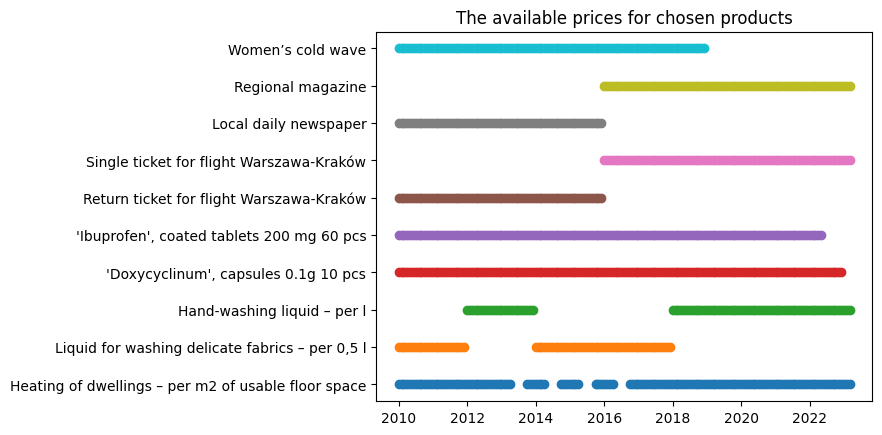

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# the goods with missing prices
goods_nan = prices_nf[prices_nf.price.isna()].good.unique()

# the whole available time interval
dates_all = pd.date_range('2010-01-01', '2023-03-01', 
    freq=pd.offsets.MonthBegin(1)
)

# plot the available prices for products
for good in goods_nan:
    dates_nan = prices_nf.query(f'price.isna() and good == "{good}"').date
    dates_available = dates_all.difference(dates_nan)
    plt.scatter(dates_available, np.full(dates_available.size, good))

plt.title('The available prices for chosen products');

The top seven products in the diagram above have missing prices in a single (continuous) interval - in the beginning or the ending of [2010-01, 2023-03]. For the two washing liquids and the heating of dwellings we have more gaps.

### The wages

So far we have cleaned the prices and the inflation datasets, which will allow us to investigate their dynamics in Poland over the last years. However, to study the impact of inflation on the consumers, we need to access the data on the wages for comparison.

In this section we work with the <a href='raw_data/wages.csv'>`wages.csv`</a> file, which has been downloaded using the [Local Data Bank](https://bdl.stat.gov.pl/bdl/dane/podgrup/temat) (Category: <font color=#ff7f0e>WAGES AND SALARIES AND SOCIAL SECURITY BENEFITS</font> -> Group: <font color=#ff7f0e>WAGES AND SALARIES</font> -> Subgroup: <font color=#ff7f0e>Average monthly gross wages and salaries in the enterprise sector by NACE Rev. 2</font>).

The file contains the average monthly gross wages in the enterprise sector, which are divided into different sections and voivodeships (including also the aggregated data on the whole country). To make the records compatible with the previous sets, we have chosen the same (monthly) granularity and time frame (2010-01 - 2023-03) as before. All of the parameters can be manipulated when working with the Local Data Bank.

As in the case of the prices above, the wages are given in Polish Zloty (PLN).

In [53]:
wages = pd.read_csv('raw_data/wages.csv', sep=';')  # separator ';'

wages.head()

,Code,Name,January;total;2010;[PLN],January;total;2011;[PLN],January;total;2012;[PLN],January;total;2013;[PLN],January;total;2014;[PLN],January;total;2015;[PLN],January;total;2016;[PLN],January;total;2017;[PLN],...,December;administrative and support service activities;2015;[PLN],December;administrative and support service activities;2016;[PLN],December;administrative and support service activities;2017;[PLN],December;administrative and support service activities;2018;[PLN],December;administrative and support service activities;2019;[PLN],December;administrative and support service activities;2020;[PLN],December;administrative and support service activities;2021;[PLN],December;administrative and support service activities;2022;[PLN],December;administrative and support service activities;2023;[PLN],Unnamed: 2018
0,0,POLAND,3230.36,3394.00,3666.41,3680.30,3805.28,3942.78,4101.36,4277.32,...,2963.95,3129.01,3379.47,3617.21,3935.00,4295.39,4798.70,5221.42,NaN,NaN
1,200000,DOLNOŚLĄSKIE,3195.75,3281.48,3454.44,3583.53,3727.70,3914.56,4093.50,4297.14,...,3116.06,3231.70,3494.43,3460.07,3944.38,4332.85,4676.11,5194.21,NaN,NaN
2,400000,KUJAWSKO-POMORSKIE,2713.92,2833.42,2998.35,3072.81,3174.54,3302.97,3413.49,3631.58,...,2523.70,2692.37,2875.16,3051.14,3219.11,3619.27,3792.26,4327.18,NaN,NaN
3,600000,LUBELSKIE,2619.39,2916.57,3308.47,3318.35,3344.70,3513.82,3913.28,3669.54,...,2816.72,2819.93,3088.72,3313.46,3661.60,3870.37,4191.93,4466.93,NaN,NaN
4,800000,LUBUSKIE,2650.41,2793.17,2963.87,3070.11,3162.26,3300.70,3452.83,3683.78,...,2068.52,2239.99,2590.05,2628.74,2924.01,3354.34,3654.56,4137.83,NaN,NaN


The structure of the obtained data frame differs from the ones observed before, i.e., the **Name** column contains the voivodeships, while each data category (the date and the employment section) occupies separate column. Before we handle the latter issue, we can drop the first and the last columns (they don't provide any relevant information) and correct the labels of the voivodeships by removing Polish accents (for compatibility with the previous files).

With the data partially cleaned, we can melt the data frame to relocate the labels into one, separate column.

In [54]:
wages = wages.iloc[:, 1:-1].rename({'Name': 'voivodeship'}, axis=1)

acc = ['Ś', 'Ą', 'Ł', 'Ó', 'Ę', 'Ń']
no_acc = ['S', 'A', 'L', 'O', 'E', 'N']

wages['voivodeship'].replace(acc, no_acc, regex=True, inplace=True)

wages = wages.melt(id_vars='voivodeship', var_name='section', 
    value_name='wage').assign(date = lambda x: x.section)

wages.sample(5, random_state=0)

,voivodeship,section,wage,date
18808,MALOPOLSKIE,July;accommodation and catering;2010;[PLN],2138.41,July;accommodation and catering;2010;[PLN]
13916,PODLASKIE,"May;professional, scientific and technical act...",4227.97,"May;professional, scientific and technical act..."
2663,POMORSKIE,January;administrative and support service act...,2422.34,January;administrative and support service act...
3851,PODKARPACKIE,February;construction;2012;[PLN],2694.28,February;construction;2012;[PLN]
15607,DOLNOSLASKIE,June;trade; repair of motor vehicles;2018;[PLN],4404.11,June;trade; repair of motor vehicles;2018;[PLN]


The **section** and **date** columns have the same records (the previous column headers) in the form:

`month;section_type;year;[PLN]`,

except for two section types: <font color=#ff7f0e>industry - water supply; sewerage, waste managament and remediation activities</font> and <font color=#ff7f0e>trade; repair of motor vehicles</font>, where the semicolon is stored also in-between.

After improving the problematic sections, we can use the semicolon separator to transform the labels.

In [55]:
# the labels with a semicolon in-between (and their corrections)
labels_sc = ['industry - water supply; sewerage, waste managament '
             'and remediation activities', 'trade; repair of motor vehicles']
labels_c = ['industry - water supply, sewerage, waste management '
             'and remediation activities', 'trade, repair of motor vehicles']

wages[['section', 'date']] = wages[['section', 'date']]\
    .replace(labels_sc, labels_c, regex=True)  # improve semicolon notation

labels = wages.section.unique()
labels_date = []
labels_section = []

# collect proper labels
for label in labels:
    label = label.split(';')
    labels_date.append(' '.join([label[0], label[2]]))
    labels_section.append(label[1])

# apply new labels and transform dates into datetime
wages.section.replace(labels, labels_section, inplace=True)
wages.date.replace(labels, labels_date, inplace=True)
wages.date = pd.to_datetime(wages.date, format='%B %Y')

wages.sample(3, random_state=0)

,voivodeship,section,wage,date
18808,MALOPOLSKIE,accommodation and catering,2138.41,2010-07-01
13916,PODLASKIE,"professional, scientific and technical activities",4227.97,2016-05-01
2663,POMORSKIE,administrative and support service activities,2422.34,2012-01-01


The check on the data types uncovers, that many of the wages are missing:

In [56]:
wages.info()

pd.Index(wages.wage.unique()).sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34272 entries, 0 to 34271
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   voivodeship  34272 non-null  object        
 1   section      34272 non-null  object        
 2   wage         26316 non-null  float64       
 3   date         34272 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.0+ MB


Float64Index([     0.0,  1477.94,  1483.86,  1484.12,  1491.08,  1496.54,
               1503.59,  1508.77,  1517.88,  1518.65,
              ...
               13468.9, 13485.69, 13554.78, 13633.44, 13830.41, 14318.79,
              14337.47, 14659.31, 16379.09,      nan],
             dtype='float64', length=25556)

As shown above, some of the entries are also equal to zero, which should be rather treated as NaNs. A simple transformation handles this issue.

In [57]:
wages.wage.replace(0.0, np.nan, inplace=True)

Due to the way the data from the Local Data Bank are queried, the frame contains also the records referencing to 2023-04 - 2023-12 period. All of these are empty, which can be observed examining the **wage** column.

In [58]:
wages[wages.date > '2023-03-01'].wage.unique()

array([nan])

We exclude the above NaNs from the final data frame for clarity.

In [59]:
wages = wages[wages.date < '2023-04-01']

### Saving the data into database

In the last step, we reorder the columns in the data frames and save the latter ones into the database, to have all the tables in one file -<a href='inflation_database.db'>`inflation_database.db`</a>.

In [60]:
import sqlite3

# reorder the columns
infl_m = infl_m[['date', 'household', 'good', 'inflation']]
infl_q = infl_q[['date', 'voivodeship', 'good', 'inflation']]

prices_f = prices_f[['date', 'voivodeship', 'good', 'price']]
prices_nf = prices_nf[['date', 'good', 'price']]

wages = wages[['date', 'voivodeship', 'section', 'wage']]

# save the data into the database
dfs = infl_m, infl_q, prices_f, prices_nf, wages
df_names = ['inflation_monthly', 'inflation_quarterly', 
    'prices_food', 'prices_non_food', 'wages']

db_conn = sqlite3.connect('inflation_database.db')

with db_conn as connection:
    for (df, df_name) in zip(dfs, df_names):
        df.to_sql(df_name, connection, index=False, if_exists='replace')

The analysis of the inflation data can be found in the next notebook - <a href="1-inflation_analysis.ipynb">1-inflation_analysis.ipynb</a>.